In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

plt.ion()

In [2]:
# Solución analítica de la ecuación propuesta
def sol_analitica(x, t):
    """Solución analítica del problema de conducción de calor en 1D con 
    condiciones de frontera de Dirichlet homogéneas y condición inicial
    u(x,0) = sin(pi*x).
    """
    return np.exp(-np.pi**2 * t) * np.sin(np.pi * x)

In [3]:
# ==============================================================================
# Declarando las variables que me van a servir. Primero las condiciones físicas
# y luego las condiciones numéricas
# ==============================================================================

# Parámetros físicos del problema
X0 = 0.                                    # Inicio de dominio (m)
XL = 1.                                    # Final del dominio (m)
t0 = 0.                                    # Tiempo inicial (s)
tF = 0.25                                  # Tiempo final (s)

# Parámetros numéricos
dx = 0.05                                  # Tamaño del paso espacial (m)  
S = 0.25                                   # Número de estabilidad (-)
dt = S * dx ** 2                           # Tamaño del paso temporal (s)   
f = 0                                      # Explícito: 0 Implícito: 1

print(f'Cada paso de tiempo será de {dt:.4f}')

Cada paso de tiempo será de 0.0006


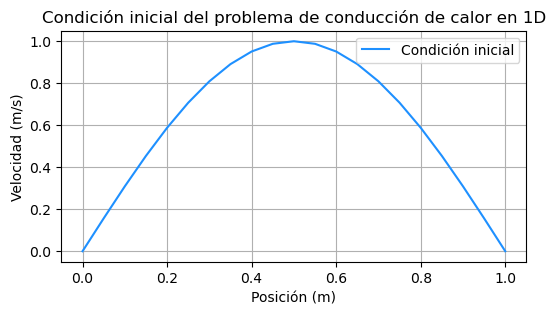

In [4]:
# Construyendo vector de posiciones y de tiempos
x = np.arange(X0, XL + dx, dx)             # Vector de posiciones
T = np.arange(t0, tF + dt, dt)             # Vector de tiempos
error = np.zeros_like(x)                   # Vector errores
norm_err = []                              # Norma del error (tamaño)

# Condición inicial
u_0 = np.sin(np.pi * x)                    # Condición inicial
u_1 = np.zeros_like(u_0)                   # "Siguiente paso"

# Graficando la condición inicial del problema en una ventana aparte. Esta parte
# del código solamente cuadra la gráfica con sus propiedades para que se vea 
# decente
plt.figure(figsize=(6, 3))

plt.plot(x, u_0, label='Condición inicial', color='dodgerblue')
plt.xlabel('Posición (m)')
plt.ylabel('Velocidad (m/s)')
plt.title('Condición inicial del problema de conducción de calor en 1D')
plt.legend()
plt.grid()
plt.draw()

In [5]:
# Considerando que la solución será puramente explícita, procedemos a iterar 
# para encontrar los nuevos valores en cada uno de los pasos de tiempo

# Abriendo instancia de gráfica para poder verlos resultados
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

# Definiendo lo que va en cada gráfico (se pasa vacío para que cuando haya datos 
# se pueda llenar la gráfica)
ex_plot, = ax[0].plot([], [], color='dodgerblue', label='Sol. explícita')
an_plot, = ax[0].plot([], [], color='salmon', ls='--', label='Sol. Exacta')
err_plot, = ax[1].semilogy([], [], color='green',
    label='Error en el dominio')
nerr_plot, = ax[2].semilogy([], [], color='blue', label='Norma de error')

# Controlando los parámetros comunes de los gráficos
ax[0].set_xlim((X0, XL))
ax[0].set_xlabel('Distancia x(m)')
ax[0].set_ylabel('Velocidad u (m/s)')
ax[0].grid()
ax[0].legend()
ax[0].set_ylim((0, np.amax(u_0) + 0.05))

ax[1].set_xlabel('Distancia x (m)')
ax[1].set_ylabel('Error relativo')
ax[1].set_xlim((X0, XL))
ax[1].set_ylim((1e-6, 1))
ax[1].grid()
ax[1].legend()

ax[2].set_xlabel('Tiempo (s)')
ax[2].set_ylabel('Norma de error')
ax[2].set_xlim((t0, tF))
ax[2].set_ylim((1e-6, 1))
ax[2].grid()
ax[2].legend()

plt.suptitle('Resultados')
plt.tight_layout()

# Iterando en el tiempo para encontrar la solución de cada uno de los dt 
# muestreados
for t in range(1, len(T)):

    # Cálculo de la solución analítica para ese paso de tiempo
    u_analit = sol_analitica(x, T[t])

    # Copiando el vector de soluciones e imponiendo las condiciones de contorno
    u_1 = u_0.copy()
    u_1[0] = 0
    u_1[-1] = 0

    # Iterando sobre los nodos internos para hallar los valores de u en cada 
    # nodo
    for i in range(1, len(x) - 1):

        # Calculando los a en cada punto
        aE = 1 / (x[i + 1] - x[i])
        aW = 1 / (x[i] - x[i - 1])
        aP0 = dx / dt
        aP = aP0

        # Calculando el valor de u_i en el paso de tiempo
        u_1[i] = aE * u_0[i + 1] + aW * u_0[i - 1] + u_0[i] * (aP0 - aE - aW)
        u_1[i] /= aP0

    # Reemplazando los valores del nuevo u en el viejo u
    u_0 = u_1.copy()

    # Cálculo del error en el paso de tiempo
    error[1:-1] = np.abs((u_analit[1:-1] - u_0[1:-1]) / u_analit[1:-1])

    # Calculando la norma del error
    norm_err.append(np.linalg.norm(error))

    # Graficando los resultados del paso de tiempo
    ex_plot.set_data(x, u_0)
    an_plot.set_data(x, u_analit)
    err_plot.set_data(x, error)
    nerr_plot.set_data(T[:t], norm_err)
    plt.suptitle(f'Resultados para t = {T[t]:.4f} s')
    clear_output(wait=True)
    display(fig)
    plt.pause(0.2)

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>